In [180]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.feature_selection import chi2

> ## Read SCV

In [181]:
df = pd.read_csv("https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/churn_data_st.csv",sep=",")
df

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,2,Month-to-month,Yes,29.85,29.85,No
1,5575-GNVDE,Male,0,34,4,One year,No,56.95,1889.50,No
2,3668-QPYBK,Male,0,2,4,Month-to-month,Yes,53.85,108.15,Yes
3,7795-CFOCW,Male,0,45,4,One year,No,42.30,1840.75,No
4,9237-HQITU,Female,0,2,2,Month-to-month,Yes,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,24,8,One year,Yes,84.80,1990.50,No
7039,2234-XADUH,Female,0,72,7,One year,Yes,103.20,7362.90,No
7040,4801-JZAZL,Female,0,11,2,Month-to-month,Yes,29.60,346.45,No
7041,8361-LTMKD,Male,1,4,3,Month-to-month,Yes,74.40,306.60,Yes


In [182]:
df.replace({r'[^\x00-\x7F]+':''}, regex=True, inplace=True)

> ## Data exploation & Cleaning 

In [183]:
df = df.drop(['customerID'], axis=1)

In [184]:
df

,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,2,Month-to-month,Yes,29.85,29.85,No
1,Male,0,34,4,One year,No,56.95,1889.50,No
2,Male,0,2,4,Month-to-month,Yes,53.85,108.15,Yes
3,Male,0,45,4,One year,No,42.30,1840.75,No
4,Female,0,2,2,Month-to-month,Yes,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...
7038,Male,0,24,8,One year,Yes,84.80,1990.50,No
7039,Female,0,72,7,One year,Yes,103.20,7362.90,No
7040,Female,0,11,2,Month-to-month,Yes,29.60,346.45,No
7041,Male,1,4,3,Month-to-month,Yes,74.40,306.60,Yes


> ### หากแสดง null data พบว่ามีแค่ feature TotalCharges ที่มีค่า null

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   tenure            7043 non-null   int64  
 3   ServiceCount      7043 non-null   int64  
 4   Contract          7043 non-null   object 
 5   PaperlessBilling  7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7016 non-null   float64
 8   Churn             7043 non-null   object 
dtypes: float64(2), int64(3), object(4)
memory usage: 495.3+ KB


In [186]:
null_data = df[df.isnull().any(axis=1)]

In [187]:
null_data.head()

,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
431,Female,0,72,7,Two year,Yes,65.20,NaN,No
488,Female,0,0,5,Two year,Yes,52.55,NaN,No
753,Male,0,0,7,Two year,No,20.25,NaN,No
936,Female,0,0,7,Two year,No,80.85,NaN,No
1082,Male,0,0,8,Two year,No,25.75,NaN,No


In [188]:
df.describe()

,SeniorCitizen,tenure,ServiceCount,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000,7016.000000
mean,0.162147,32.371149,5.446259,64.761692,2282.589168
std,0.368612,24.559481,1.964916,30.090047,2265.506114
min,0.000000,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,4.000000,35.500000,401.925000
50%,0.000000,29.000000,6.000000,70.350000,1397.100000
75%,0.000000,55.000000,7.000000,89.850000,3792.325000
max,1.000000,72.000000,9.000000,118.750000,8684.800000


> #### fill na with median()

In [189]:
df.fillna(df.median(),inplace=True)

In [190]:
df.describe()

,SeniorCitizen,tenure,ServiceCount,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,5.446259,64.761692,2279.194562
std,0.368612,24.559481,1.964916,30.090047,2261.820939
min,0.000000,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,4.000000,35.500000,403.775000
50%,0.000000,29.000000,6.000000,70.350000,1397.100000
75%,0.000000,55.000000,7.000000,89.850000,3778.050000
max,1.000000,72.000000,9.000000,118.750000,8684.800000


In [191]:
afterFillNa = df[df.isnull().any(axis=1)]
afterFillNa

,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn


>> #### Affter Fill NaN value with Median(

> # Find  highly Correlation of features

In [192]:
interesting_fe = df[['tenure','ServiceCount', 'MonthlyCharges','TotalCharges']]
interesting_fe

,tenure,ServiceCount,MonthlyCharges,TotalCharges
0,1,2,29.85,29.85
1,34,4,56.95,1889.50
2,2,4,53.85,108.15
3,45,4,42.30,1840.75
4,2,2,70.70,151.65
...,...,...,...,...
7038,24,8,84.80,1990.50
7039,72,7,103.20,7362.90
7040,11,2,29.60,346.45
7041,4,3,74.40,306.60


In [193]:
interesting_fe.corr()

,tenure,ServiceCount,MonthlyCharges,TotalCharges
tenure,1.000000,0.508526,0.247900,0.824067
ServiceCount,0.508526,1.000000,0.041463,0.442010
MonthlyCharges,0.247900,0.041463,1.000000,0.649631
TotalCharges,0.824067,0.442010,0.649631,1.000000


<AxesSubplot:>

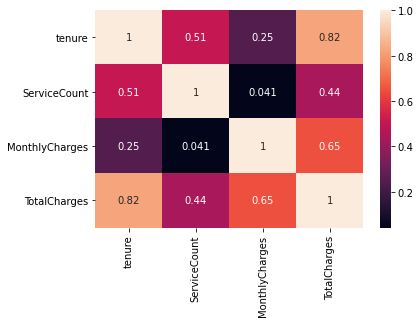

In [194]:

sns.heatmap(interesting_fe.corr(),annot=True )

In [195]:
lower_cor = pd.DataFrame(np.tril(interesting_fe.corr(), -1), columns = interesting_fe.corr().columns)
lower_cor

,tenure,ServiceCount,MonthlyCharges,TotalCharges
0,0.000000,0.000000,0.000000,0.0
1,0.508526,0.000000,0.000000,0.0
2,0.247900,0.041463,0.000000,0.0
3,0.824067,0.442010,0.649631,0.0


# เลือก feat. ที่มี highly correlation 
# จากนั้น list ออกมา
# df คือ interesting df ไม่ใช่ df ทั้งหมด

def correlation (interesting_df , threshold):
    feature_corr = set() #set ของ features
    corr_matrix = interesting_df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(len(corr_matrix)) :
            if (corr_matrix.iloc[i, j]) >  threshold and corr_matrix.iloc[i, j] != 1  : 
                print((corr_matrix.columns[i] , corr_matrix.iloc[i, j]) ,">" ,threshold)
                colname=corr_matrix.columns[i]
                feature_corr.add(colname)
    return feature_corr

In [196]:
# correlation_features=correlation(lower_cor, 0.60)

In [197]:
to_drop = [column for column in lower_cor if any(lower_cor[column] > 0.6)]
to_drop

['tenure', 'MonthlyCharges']

In [198]:
interesting_fe = interesting_fe.drop(to_drop,axis=1)

In [199]:
interesting_fe

,ServiceCount,TotalCharges
0,2,29.85
1,4,1889.50
2,4,108.15
3,4,1840.75
4,2,151.65
...,...,...
7038,8,1990.50
7039,7,7362.90
7040,2,346.45
7041,3,306.60


In [200]:
df = df.drop(to_drop,axis=1)

In [201]:
df

,gender,SeniorCitizen,ServiceCount,Contract,PaperlessBilling,TotalCharges,Churn
0,Female,0,2,Month-to-month,Yes,29.85,No
1,Male,0,4,One year,No,1889.50,No
2,Male,0,4,Month-to-month,Yes,108.15,Yes
3,Male,0,4,One year,No,1840.75,No
4,Female,0,2,Month-to-month,Yes,151.65,Yes
...,...,...,...,...,...,...,...
7038,Male,0,8,One year,Yes,1990.50,No
7039,Female,0,7,One year,Yes,7362.90,No
7040,Female,0,2,Month-to-month,Yes,346.45,No
7041,Male,1,3,Month-to-month,Yes,306.60,Yes


> # Remove Variable with High p-value from Chi-square

In [202]:
le = preprocessing.LabelEncoder()

In [203]:
df['PaperlessBilling'].unique()

array(['Yes', 'No'], dtype=object)

In [204]:
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [205]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [206]:
df['gender_label'] = le.fit_transform(df['gender'])
df['Contract_label'] = le.fit_transform(df['Contract'])
df['PaperlessB_label'] = le.fit_transform(df['PaperlessBilling'])
df['Churn'] = le.fit_transform(df['Churn'])

In [207]:
df

,gender,SeniorCitizen,ServiceCount,Contract,PaperlessBilling,TotalCharges,Churn,gender_label,Contract_label,PaperlessB_label
0,Female,0,2,Month-to-month,Yes,29.85,0,0,0,1
1,Male,0,4,One year,No,1889.50,0,1,1,0
2,Male,0,4,Month-to-month,Yes,108.15,1,1,0,1
3,Male,0,4,One year,No,1840.75,0,1,1,0
4,Female,0,2,Month-to-month,Yes,151.65,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,8,One year,Yes,1990.50,0,1,1,1
7039,Female,0,7,One year,Yes,7362.90,0,0,1,1
7040,Female,0,2,Month-to-month,Yes,346.45,0,0,0,1
7041,Male,1,3,Month-to-month,Yes,306.60,1,1,0,1


In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   ServiceCount      7043 non-null   int64  
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   TotalCharges      7043 non-null   float64
 6   Churn             7043 non-null   int32  
 7   gender_label      7043 non-null   int32  
 8   Contract_label    7043 non-null   int32  
 9   PaperlessB_label  7043 non-null   int32  
dtypes: float64(1), int32(4), int64(2), object(3)
memory usage: 440.3+ KB


In [220]:
Output = df['Churn']
Variables = df[['gender_label','Contract_label','PaperlessB_label']]
Chi_table = chi2(Variables,Output)

Index(['gender_label', 'Contract_label', 'PaperlessB_label'], dtype='object')

In [210]:
Chi_table

(array([2.58698618e-01, 1.11578017e+03, 1.05680863e+02]),
 array([6.11015635e-001, 1.22794132e-244, 8.66198711e-025]))

In [212]:
p_value = Chi_table[1]
p_value

array([6.11015635e-001, 1.22794132e-244, 8.66198711e-025])

In [231]:
lower_chi = pd.DataFrame(np.array([p_value]) ,columns=Variables.columns)
lower_chi

,gender_label,Contract_label,PaperlessB_label
0,0.611016,1.227941e-244,8.661987e-25


In [234]:
droping_fe = [column for column in lower_chi if any(lower_chi[column] > 0.05)]
droping_fe

['gender_label']